<h3 align="right">hPu, &nbsp; dSPN, &nbsp; 150602_c1_D1, &nbsp; AB5_porta76_cel3 </h3>

# Model selection

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/AB5_porta76_cel3.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_356.soma.v': 'expdata/ECall_IV_ch3_356.dat',
    'IV_364.soma.v': 'expdata/ECall_IV_ch3_364.dat',    
    'IDthresh-sub_398.soma.v': 'expdata/ECall_IDthresh_ch3_398.dat',    
    'IDthresh_400.soma.v': 'expdata/ECall_IDthresh_ch3_400.dat',    
    'IDthresh_402.soma.v': 'expdata/ECall_IDthresh_ch3_402.dat',    
    'IDthresh_410.soma.v': 'expdata/ECall_IDthresh_ch3_410.dat',    
}

## Simulation environment

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
from utils import *

In [5]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/AB5_porta76_cel3.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.basal: cat32

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


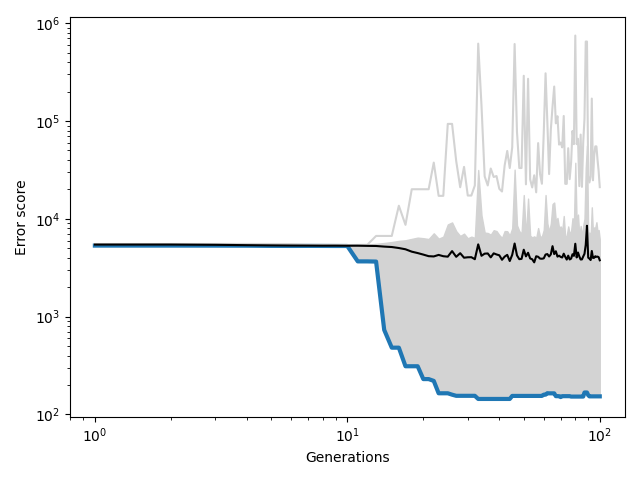

In [12]:
plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
gbar_naf.axonal,9.256,7.857,7.502,10,7.716,9.643,7.077,7.316,8.26,5.938
gbar_kas.axonal,0.007154,0.001801,0.004046,0.02959,0.002039,0.003173,0.005764,0.002457,0.004056,0.06206
gbar_Im.axonal,0.04524,0.03069,0.03686,0.0683,0.04552,0.03537,0.05664,0.008987,0.01818,0.01166
gbar_naf.somatic,9.437,9.913,9.943,8.498,9.83,10,9.706,9.661,9.915,9.91
gbar_kaf.somatic,0.1553,0.1255,0.1032,0.1639,0.1032,0.2636,0.1641,0.3274,0.1067,0.1071
gbar_kas.somatic,0.001787,7.477e-05,0.0002163,0.000409,0.0002174,0.001922,0.007035,7.678e-05,0.0002908,0.002209
gbar_kdr.somatic,0.0001825,0.0003938,0.0007491,0.0006729,0.0008951,0.0007191,2.058e-06,0.0005578,0.0006981,0.0001924
gbar_bk.somatic,0.0002457,0.0002045,3.851e-06,6.994e-05,1.718e-05,9.368e-05,7.642e-06,3.16e-05,9.56e-07,0.0002629
gbar_sk.somatic,0.0001333,7.208e-05,8.451e-05,0.0002178,8.451e-05,3.109e-06,0.0003358,0.0002117,0.0001247,0.0001005
gbar_Im.somatic,0.002422,0.004325,0.00375,0.001333,0.00375,0.0002754,0.0007905,0.002156,0.003213,0.001754


<IPython.core.display.Javascript object>


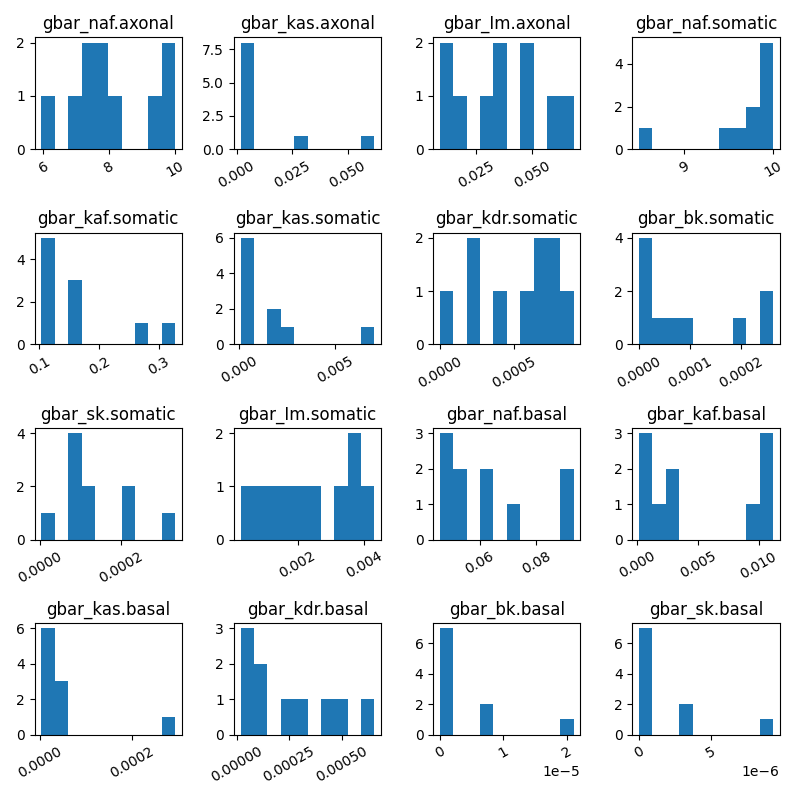

In [14]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


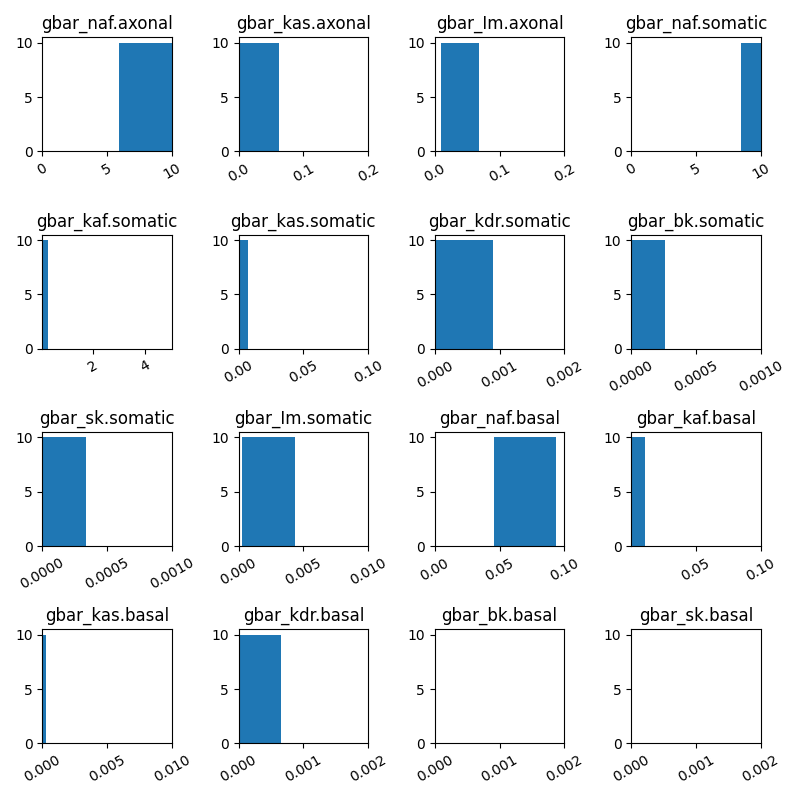

In [15]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [16]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

In [17]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [22]:
ind = 1
test_parameters = best_models[ind]

In [23]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


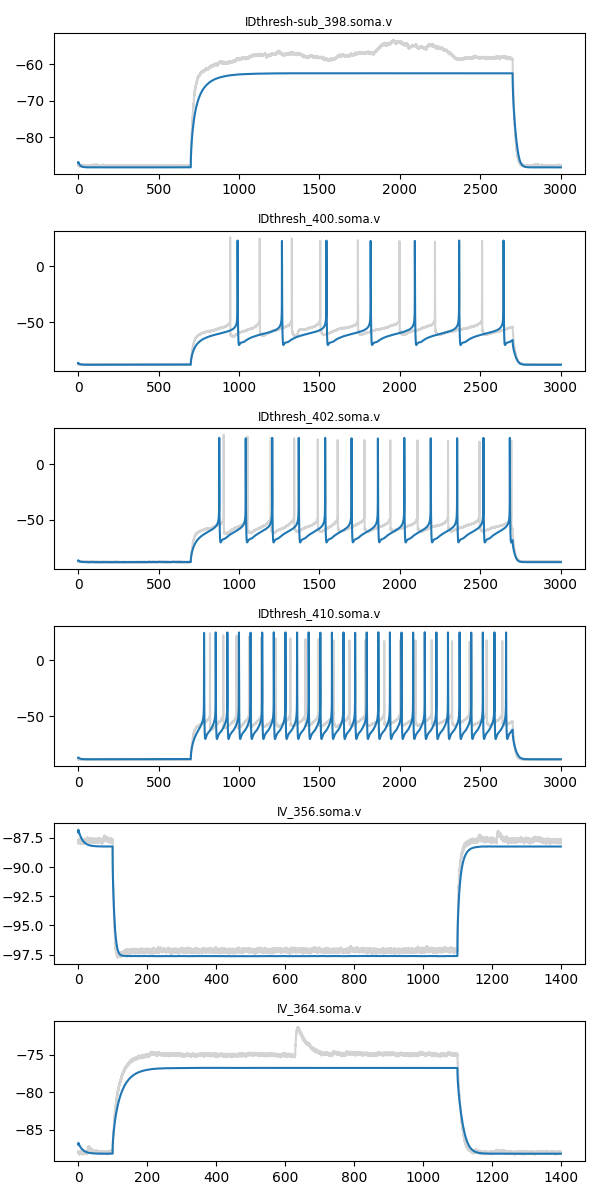

In [24]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


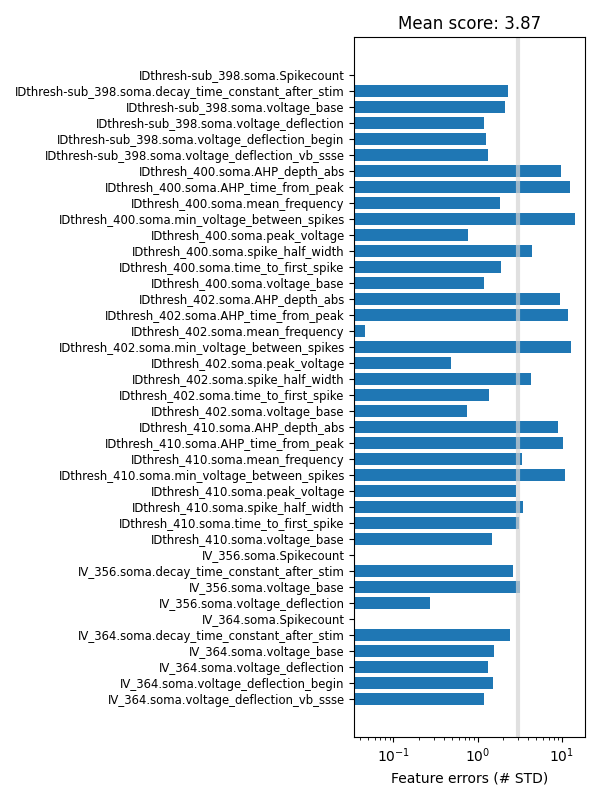

In [21]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [22]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.890000,2.390000,2.170000,2.290000,2.480000,2.430000,2.290000,2.280000,2.190000
1,1.890000,0.000000,1.740000,2.130000,1.370000,2.330000,2.660000,1.990000,1.790000,2.190000
2,2.390000,1.740000,0.000000,2.000000,1.100000,2.150000,2.250000,2.190000,1.570000,2.290000
3,2.170000,2.130000,2.000000,0.000000,1.940000,2.300000,2.260000,2.080000,2.310000,1.930000
4,2.290000,1.370000,1.100000,1.940000,0.000000,2.160000,2.340000,2.030000,1.490000,2.260000
5,2.480000,2.330000,2.150000,2.300000,2.160000,0.000000,2.510000,2.380000,2.230000,2.300000
6,2.430000,2.660000,2.250000,2.260000,2.340000,2.510000,0.000000,2.410000,2.540000,2.260000
7,2.290000,1.990000,2.190000,2.080000,2.030000,2.380000,2.410000,0.000000,2.060000,2.310000
8,2.280000,1.790000,1.570000,2.310000,1.490000,2.230000,2.540000,2.060000,0.000000,2.260000
9,2.190000,2.190000,2.290000,1.930000,2.260000,2.300000,2.260000,2.310000,2.260000,0.000000


In [23]:
hall_of_fame = []
selected = [1,2,4,5,8]  # range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)